### Portfolio assignment 6
60 min: Perform a univariate analysis on at least 2 columns with categorical data and on at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Commit the Notebook to your portfolio when you're finished.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
steam = pd.read_csv(r"steam_games.csv")
steam.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN


## Top 10 most rated games
This doesn't mean top rated, just the games with the most ratings.

In [3]:
steam[['name','all_reviews']].sort_values(by='all_reviews', ascending=False).head(10)

,name,all_reviews
3642,The Heiress,"Very Positive,(998),- 86% of the 998 user revi..."
8917,Don't Starve: Hamlet,"Very Positive,(996),- 89% of the 996 user revi..."
1270,Command & Conquer: Red Alert 3 - Uprising,"Very Positive,(995),- 85% of the 995 user revi..."
8501,Zero-K,"Very Positive,(994),- 90% of the 994 user revi..."
9322,MUSYNX,"Very Positive,(994),- 82% of the 994 user revi..."
3741,Full Throttle Remastered,"Very Positive,(992),- 93% of the 992 user revi..."
1301,Immortal Redneck,"Very Positive,(992),- 92% of the 992 user revi..."
2023,Turok 2: Seeds of Evil,"Very Positive,(990),- 94% of the 990 user revi..."
8553,SUPER FLAIL,"Very Positive,(99),- 92% of the 99 user review..."
8053,Towards The Pantheon: Escaping Eternity,"Very Positive,(99),- 90% of the 99 user review..."


## Top 10 most recent games

In [4]:
steam.release_date.dtypes

dtype('O')

We're going to convert the Object column to datetime64

In [5]:
recentSteam = steam

In [6]:
recentSteam.release_date = pd.to_datetime(steam.release_date, errors='coerce').dropna()

In [7]:
recentSteam[['name','release_date']].sort_values(by='release_date',ascending=False).head(10)

,name,release_date
38508,Zoroastra,2025-04-03
5436,Telecube Nightmare,2023-12-25
31581,Magical Star Pillars Anniversary Edition,2022-12-31
31275,8-in-1 IQ Scale Bundle - Quirky Jerk (OST),2022-07-25
35215,WAIFU WARS ONLINE,2022-02-02
31356,Captain's Tail,2022-01-01
33776,DEEP 8,2021-08-04
33404,KingOfEgyptGX,2021-06-01
33621,Mongrel,2021-04-01
36842,GreenFlame,2021-01-01


So it seems some upcoming games slipped into here, we can filter those.

In [8]:
from datetime import datetime
recentSteam['release_date'].loc['1970-01-01':datetime.today().strftime('%Y-%m-%d')].dropna()

19701   2013-04-04
19703   2013-07-31
19704   2015-08-28
19705   2015-07-10
19706   2016-01-19
           ...    
20205   2018-03-08
20206   2016-12-22
20207   2017-01-10
20208   2017-01-30
20209   2016-12-08
Name: release_date, Length: 441, dtype: datetime64[ns]

So, finally.

In [9]:
today = datetime.today().strftime('%Y-%m-%d')
recentSteam['release_date'] = recentSteam['release_date'].loc[recentSteam['release_date'] <= today]
recentSteam = recentSteam[['name','release_date']].sort_values(by='release_date',ascending=False).dropna()
recentSteam

,name,release_date
38912,Return to Nangrim,2021-01-01
32095,CHROMATOSE,2021-01-01
36842,GreenFlame,2021-01-01
31466,Star Fighters,2020-12-31
40441,The Ghost of Joe Papp: 101 Ways To Kill Writer...,2020-12-02
...,...,...
3676,Silent Service,1985-01-01
5570,The Castles of Dr. Creep,1984-11-01
8224,Space Ace,1984-04-29
2096,Dragon's Lair,1983-06-19


## Most achievements

In [10]:
steam[['name','achievements']].dropna().sort_values('achievements',ascending=False).head(10)

,name,achievements
20589,LOGistICAL,9821.0
12720,Trivia Vault: Movie Trivia,5000.0
24971,Panda Run,5000.0
29201,The Dropping of The Dead,5000.0
5520,USA 2020,5000.0
26996,Ninja Stealth 3,5000.0
5541,Math Problem Challenge,5000.0
10153,Digit Daze,5000.0
17660,Trivia Vault: Auto Racing Trivia,5000.0
25321,Cludbugz's Twisted Magic,5000.0


These kind of results make me doubt the legitimancy of this dataset, but I'll assume this is correct.

So I can't find any categorical data in my dataset, which means i'll get another one.

In [11]:
vg = pd.read_csv('vgsales.csv')
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Most popular genres

<AxesSubplot:>

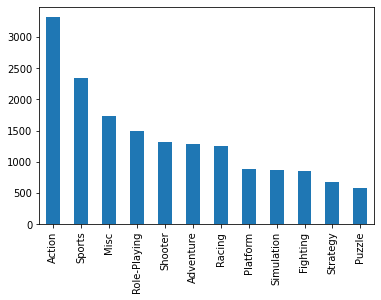

In [12]:
vg['Genre'].value_counts().plot(kind='bar')

## Most popular Platform

<AxesSubplot:>

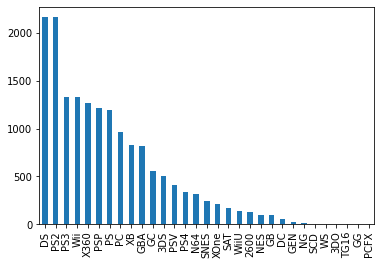

In [13]:
vg['Platform'].value_counts().plot(kind='bar')